## 손씻기의 비극 - t-test 및 분포 

- 오늘 우리는  1818년에 태어나 비엔나 종합병원에서 일했던 헝가리 의사 "이그나츠 젬멜와이스"가 된다. 

<img src="assets/ignaz.png">

- 과거에 사람들은 박테리아, 세균, 바이러스에 대해 몰랐다. 사람들은 "나쁜 공기" 또는 악령 때문에 병에 걸린 것이라고 생각했다. 하지만 1800년대 의사들은 인체를 해부하고 부검한 데이터를 기반으로 주장하기 시작했다. 
- 젬멜와이스는 비엔나 종합병원의 수술에서 뭔가가 잘못되었다고 의심하기 시작했다. 젬말와이스는 왜 그렇게 많은 여성들이 분만실에서 산욕열(산후열이라고도 하며, 산모가 출산 후 첫 24간을 제외한 10일 이내에 이틀 동한 측정한 체온이 38도 이상인 것을 말함)로 목숨을 잃는지 알고 싶어했다. 

### 이번 시간에 Study 할 사항 
- 데이터를 이용해 설득력 있는 주장을 하는 법
- 히스토그램을 첨부해 분포의 차이를 보여주는 방법
- 커널 밀도 추정(KDE)을 이용해 분포 추정치를 그래픽으로 보여주는 방법
- SciPy를 사용하고 p-value를 확인함으로써 통계적 유의성을 시험하는 방법
- Matplotlib에서 시계열 차트의 다른 부분들을 강조하는 방법
- Matplotlib에서 범례를 추가하고 설정하는 방법
- NumPy의 .where() 함수를 사용해 조건에 따라 요소 처리하기

### 1. 데이터 사전 탐구와 비엔나 병원의 출생자, 사망자 수 시각화하기

- 우리(젬멜와이스)는 비엔나 종합병원에서 일하고 있다. 1840년대에 걸쳐 출산 및 산모 사망 횟수에 관해 우리가 수집해 온 데이터를 자세히 살펴보자

<img src="assets/hp_history.png">

#### 1-1. 데이터 탐색 

In [72]:
# 필요한 패키지 불러오기 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import plotly.graph_objects as go 
import plotly.express as px 
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기 
df_year = pd.read_csv('data/annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('data/monthly_deaths.csv')

In [3]:
# 년도 및 데이터 개수 확인
print(f'Year data shape is {df_year.shape}')
print(df_year.head())
print(f'Monthly data shape is {df_monthly.shape}')
print(df_monthly.tail())

Year data shape is (12, 4)
   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
Monthly data shape is (98, 3)
          date  births  deaths
93  1848-11-01     310       9
94  1848-12-01     373       5
95  1849-01-01     403       9
96  1849-02-01     389      12
97  1849-03-01     406      20


In [4]:
# 데이터 정보 1 - Year Data
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
# 데이터 정보 2 - Monthly
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [6]:
# 중복 데이터 확인 
print(f'Any yearly duplicates? {df_year.duplicated().values.any()}')
print(f'Any monthly duplicates? {df_monthly.duplicated().values.any()}')

Any yearly duplicates? False
Any monthly duplicates? False


- 1841년에서 1849년 까지를 포함한다는 사실을 알 수 있다. 데이터들은 출산 및 산모 사망의 총횟수를 보여준다. 
- 연 데이터는 출 산 및 산모 사망 횟수를 병동에 따라 나눴다. 
- NaN 값, 중복 값 두 데이터 모두 없다. 

In [7]:
# 통계값 확인 - monthly data 
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [8]:
# 통계값 확인 - year data 
df_year.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


- 각각 두 데이터의 통계 데이터를 살펴 보니 매월 평균적으로 약 267회의 출산과 22.47회의 산모 사망이 있었다는 것을 알 수 있었다.

#### 1-2. 출산 시 사망하는 여성의 비율 

In [9]:
# 출산 시 사망하는 여성 비율 구하기 - (사망수 전체 합 / 출산 수 전체 합) * 100
prob = (df_year.deaths.sum() / df_year.births.sum()) * 100
print(f'Chances of dying in the 1840s in Vienna: {prob: .3}%')

Chances of dying in the 1840s in Vienna:  7.08%


- 1840년대 출산은 매우 위험했습니다. 무려 7.08%의 산모가 사망하는 결과가 나왔습니다. (2013년 미국의 산모 사망률은 0.018% 이다)

#### 1-3. 시간에 따른 출산 및 산모 사망의 총횟수 시각화 

In [10]:
# 시각화 전에 전처리 - date 컬럼을 datetime 형식으로 변환
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

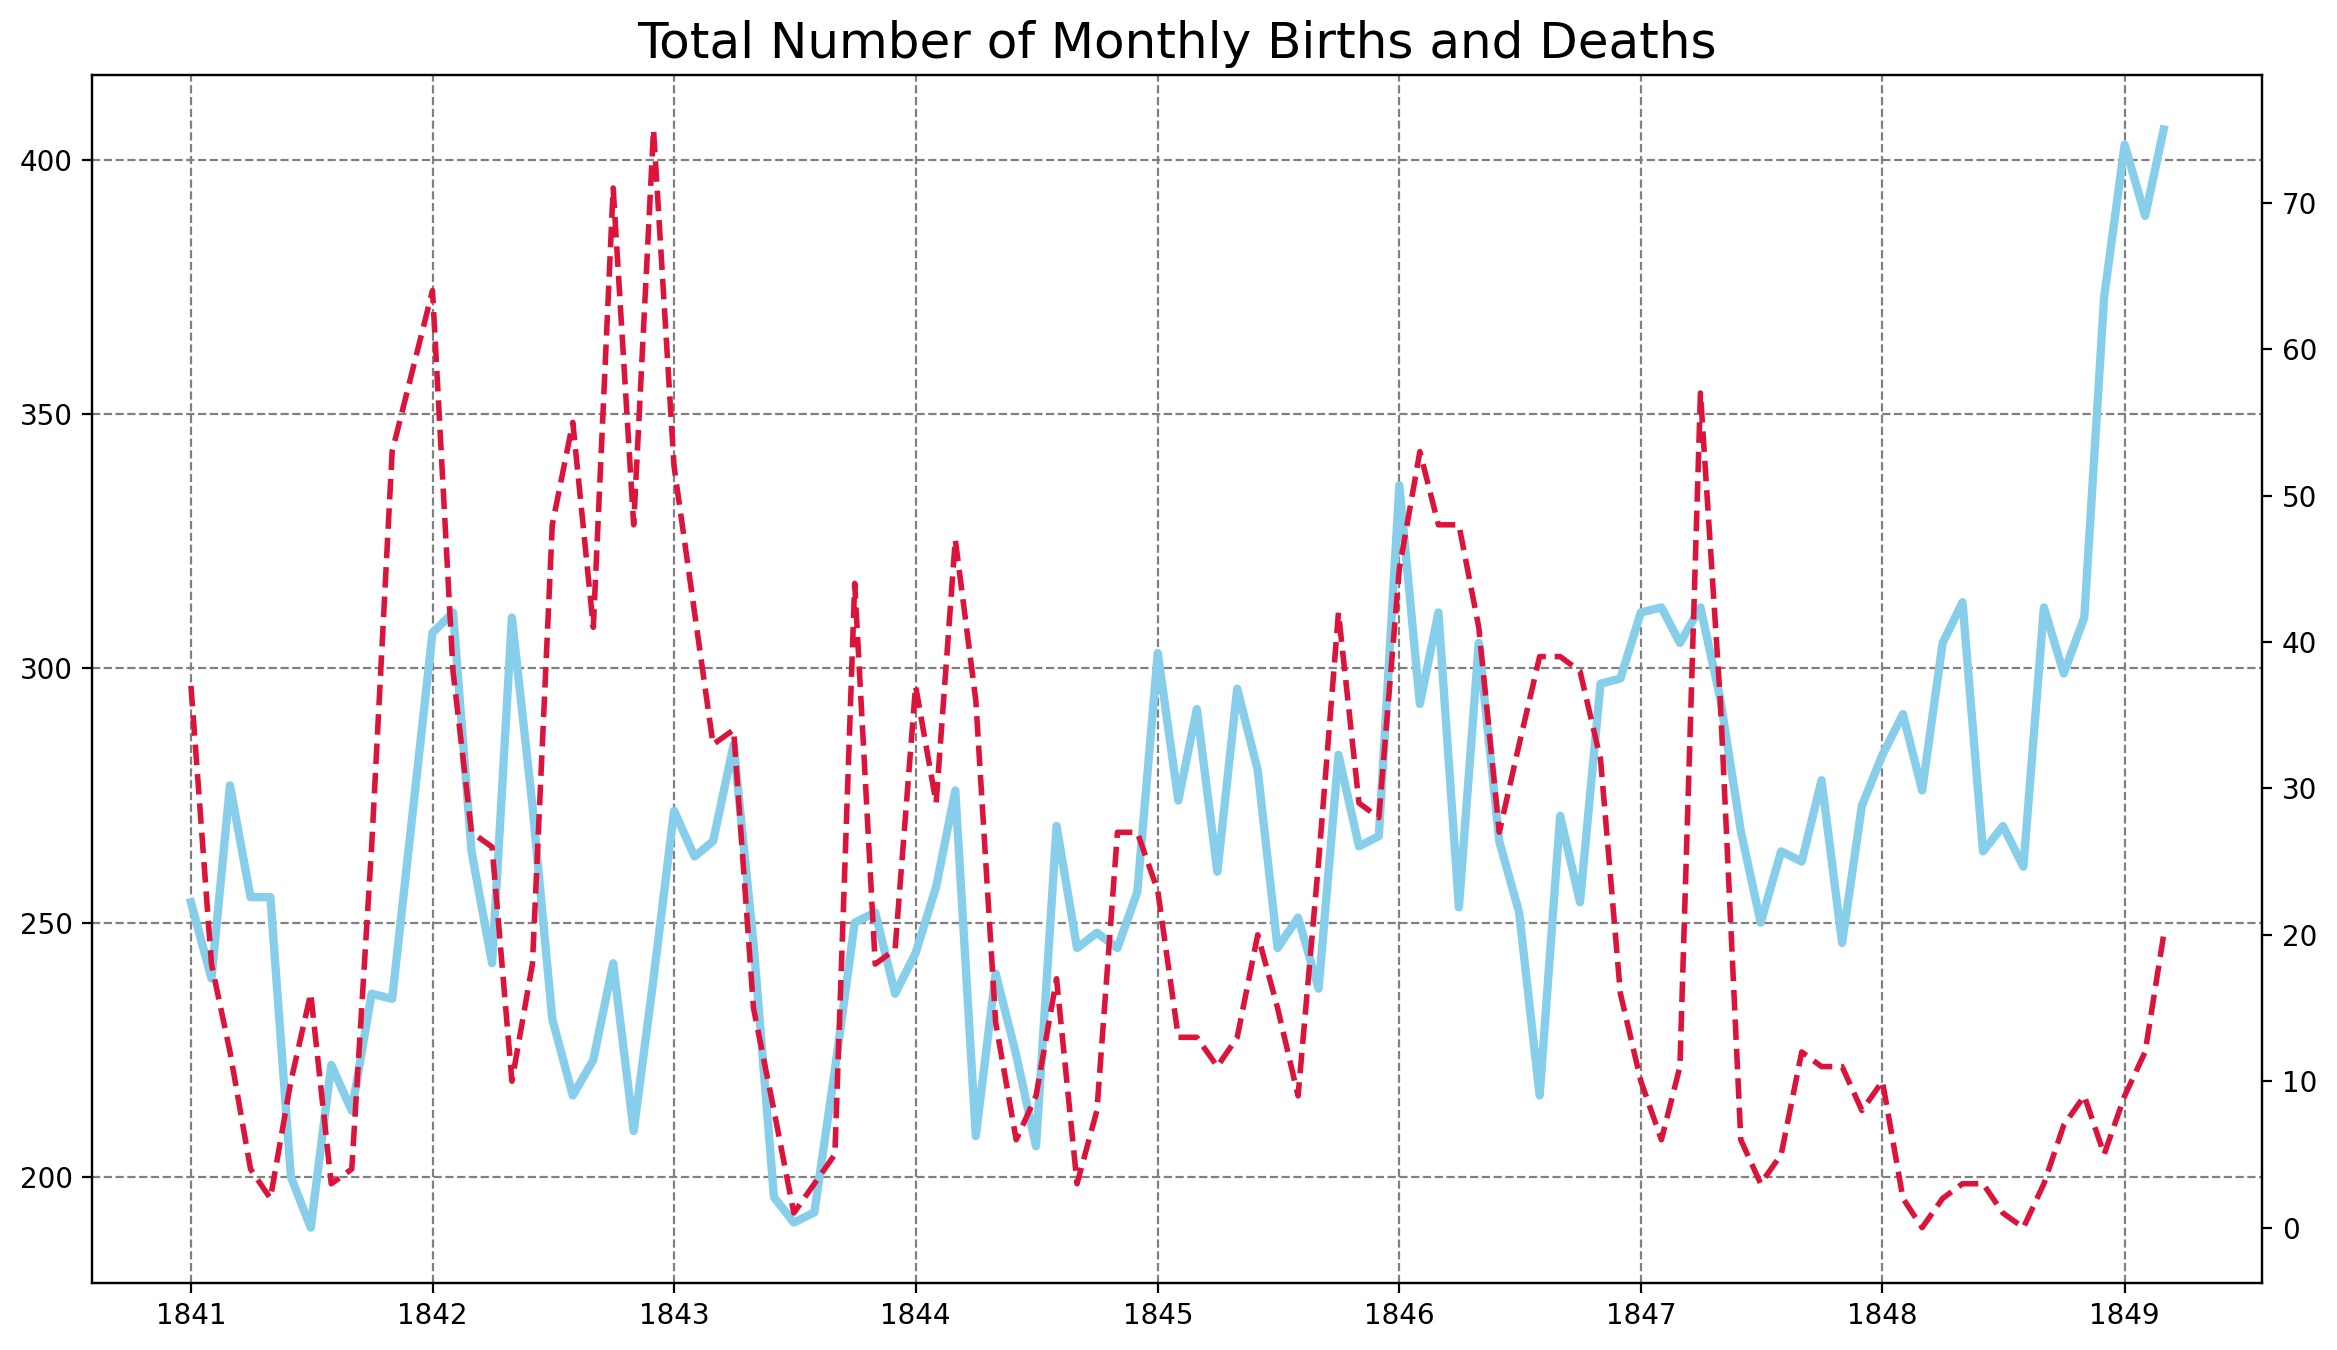

In [11]:
# 데이터 시각화 
plt.figure(figsize=(14,8), dpi=200)                                  # 사이즈와 인치당 도트수 설정
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)  # 타이틀 설정
 
ax1 = plt.gca()                                      # 현재 축 얻고 
ax2 = ax1.twinx()                                    # 동일한 X축을 공유하는 다른 축 생성 
 
ax1.grid(color='grey', linestyle='--')               # 격자 추가

# 차트 생성 및 스타일 추가 
ax1.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.births,                          # 기준 데이터 - 왼쪽 y축 - 산모 출산수 
         color='skyblue',                            # 선 색상 설정
         linewidth=3)                                # 선 두께 설정
 
ax2.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.deaths,                          # 기준 데이터 - 오른쪽 y축 - 산모 사망수
         color='crimson',                            # 선 색상 설정
         linewidth=2,                                # 산 두께 설정 
         linestyle='--')                             # 산 스타일 설정
 
plt.show()

In [12]:
# 년도 기준 설정 - "YearLocator()" 및 "MonthLocator()" 객체 선언 
years = mdate.YearLocator()
months = mdate.MonthLocator()
years_fmt = mdate.DateFormatter('%Y') 

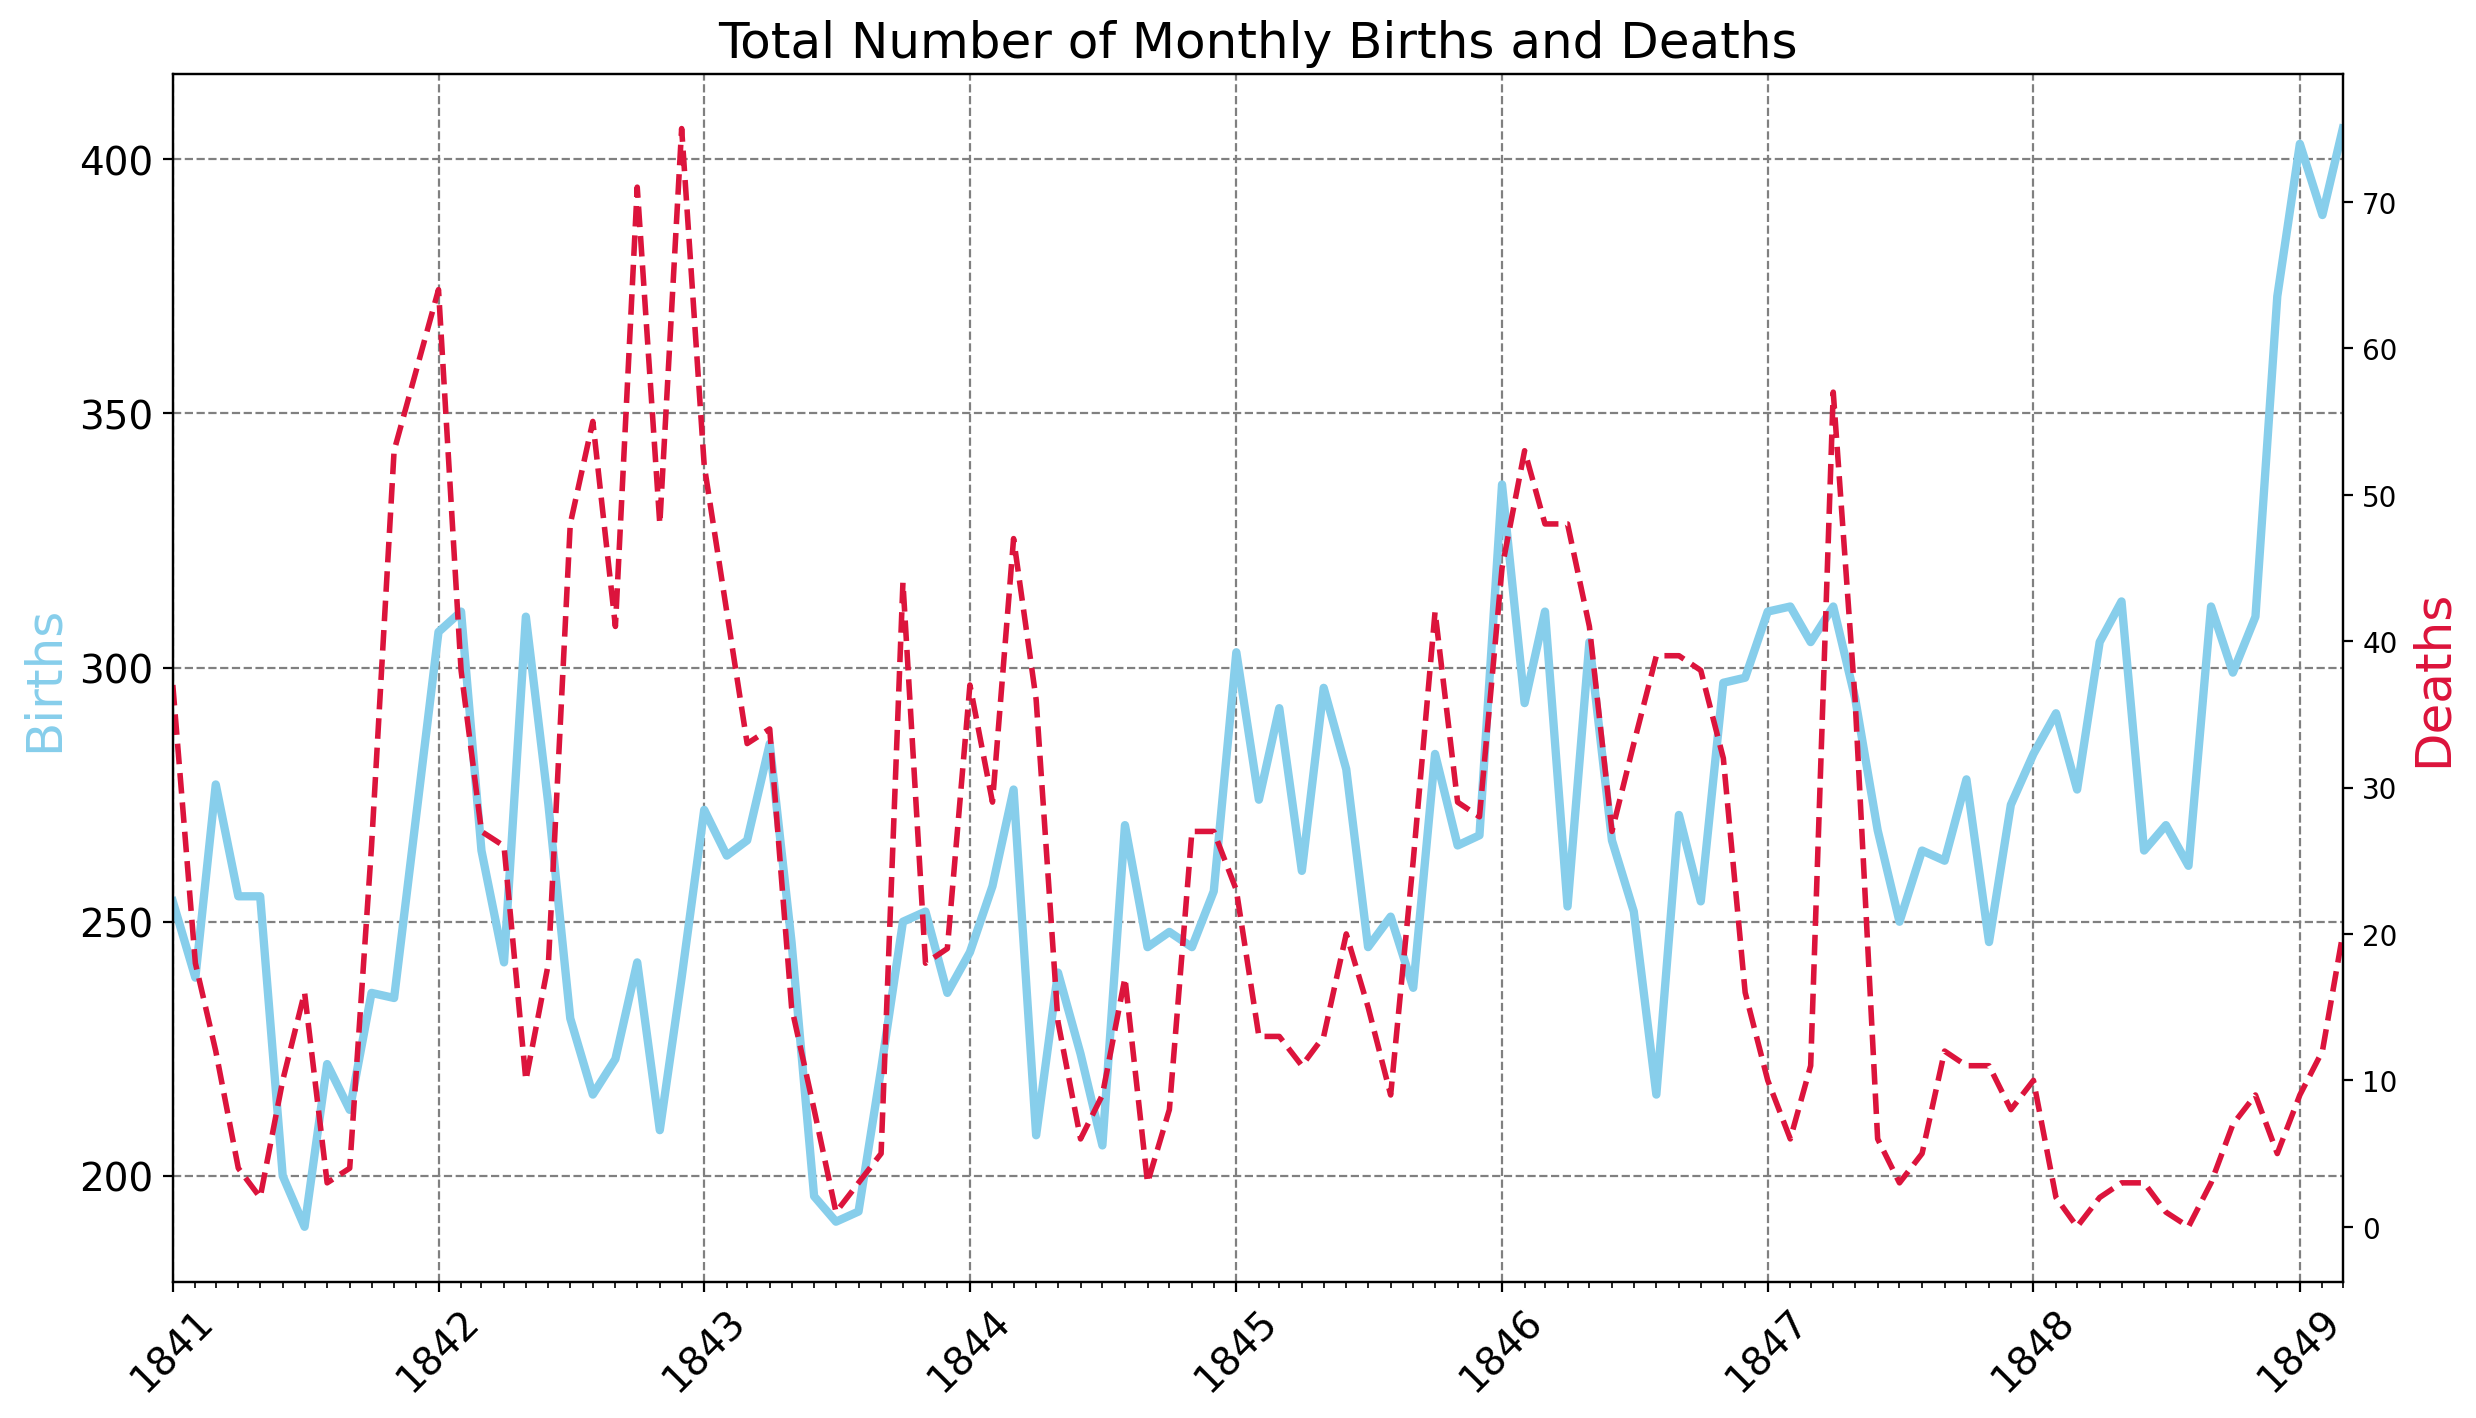

In [13]:
# 데이터 시각화 - 추가 및 수정
plt.figure(figsize=(14,8), dpi=200)                                  # 사이즈와 인치당 도트수 설정
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)  # 타이틀 설정
plt.yticks(fontsize=14)                                              # y축 레이블 크기 설정  
plt.xticks(fontsize=14, rotation=45)                                 # x축 레이블 크기 설정 및 각도 설정 
plt.grid(color='gray', linestyle='--')                               # 격자 설정 

ax1 = plt.gca()                                                      # 현재 축 얻고 
ax2 = ax1.twinx()                                                    # 동일한 X축을 공유하는 다른 축 생성 

# 레이블 추가 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)               # ax1 레이블 설정 
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)               # ax2 레이블 설정 

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])         # x축의 최소값 및 최대값 설정 
ax1.xaxis.set_major_locator(years)                                   # 년도 적용 
ax1.xaxis.set_major_formatter(years_fmt)                             # 년도 지정된 데이터포메터 적용
ax1.xaxis.set_minor_locator(months)                                  # 월 적용

# 차트 생성 및 스타일 추가 
ax1.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.births,                          # 기준 데이터 - 왼쪽 y축 - 산모 출산수 
         color='skyblue',                            # 선 색상 설정
         linewidth=3)                                # 선 두께 설정
 
ax2.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.deaths,                          # 기준 데이터 - 오른쪽 y축 - 산모 사망수
         color='crimson',                            # 선 색상 설정
         linewidth=2,                                # 산 두께 설정 
         linestyle='--')                             # 산 스타일 설정

plt.show()

- 1847년도 이후 특이한 패턴이 보인다. 출산 횟수가 늘어났음에도 산모 사망 총수는 감소한 것으로 나타났다.

### 2. 병동에 따라 분리한 연 데이터 분석하기
- 비엔나 종합 병원에는 1병동과 2병동에 산부인과 병동이 두 개나 있다. 1병동에는 남자 의사와 의대생들이 있었고, 2병동에는 여자 산파(출산을 도와주는 사람)들이 있었다.

#### 2-1. 병동별 연 데이터 분리 

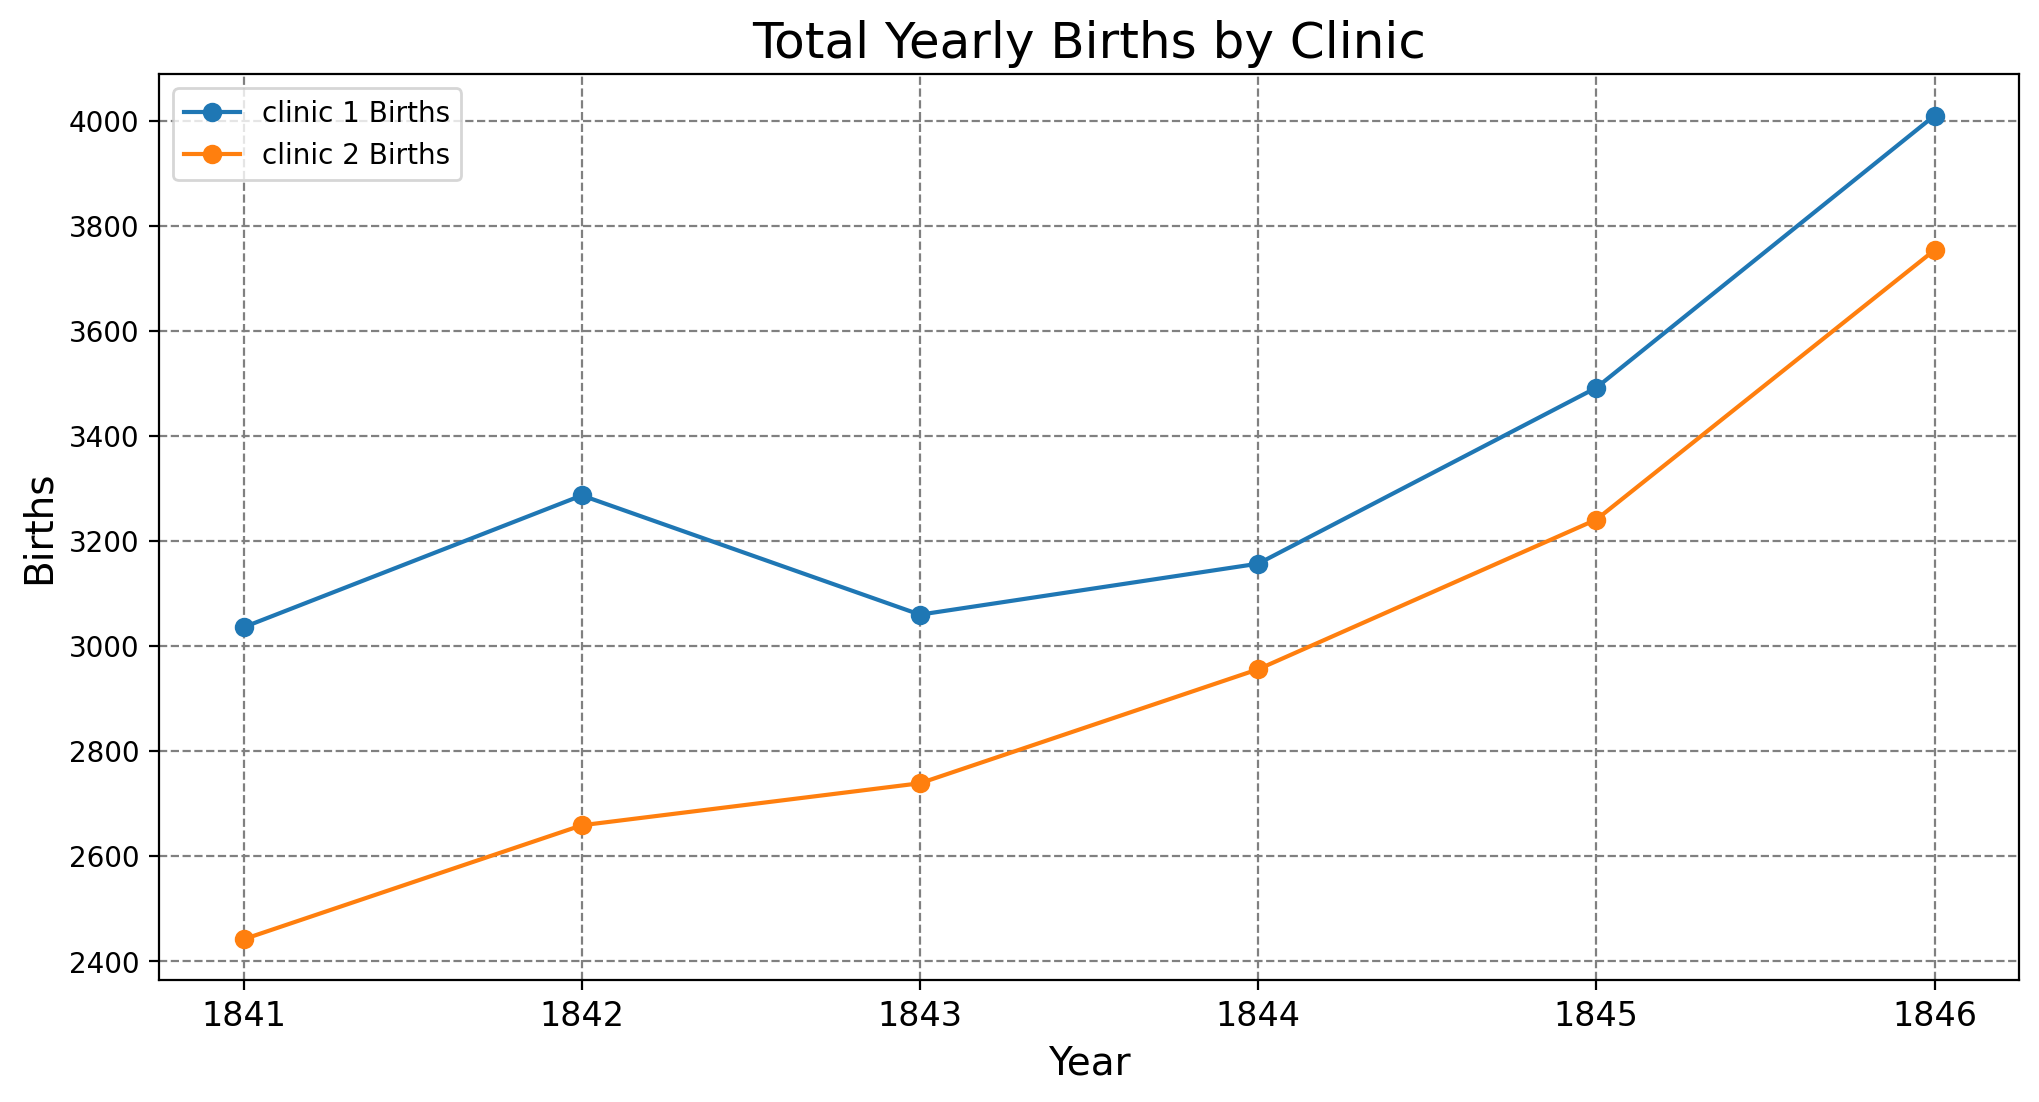

In [14]:
# 병동 별 출산 산모수 그래프 
plt.figure(figsize=(12, 6), dpi=200)
plt.title('Total Yearly Births by Clinic', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Births', fontsize=14)
plt.xticks(df_year['year'].unique(), fontsize=12)

# Clinic 1과 Clinic 2에 대한 선 그래프
for clinic in df_year['clinic'].unique():
    plt.plot(df_year[df_year['clinic'] == clinic]['year'], df_year[df_year['clinic'] == clinic]['births'], label=f'{clinic} Births', marker='o')

plt.legend()
plt.grid(color='gray', linestyle='dashed')
plt.show()

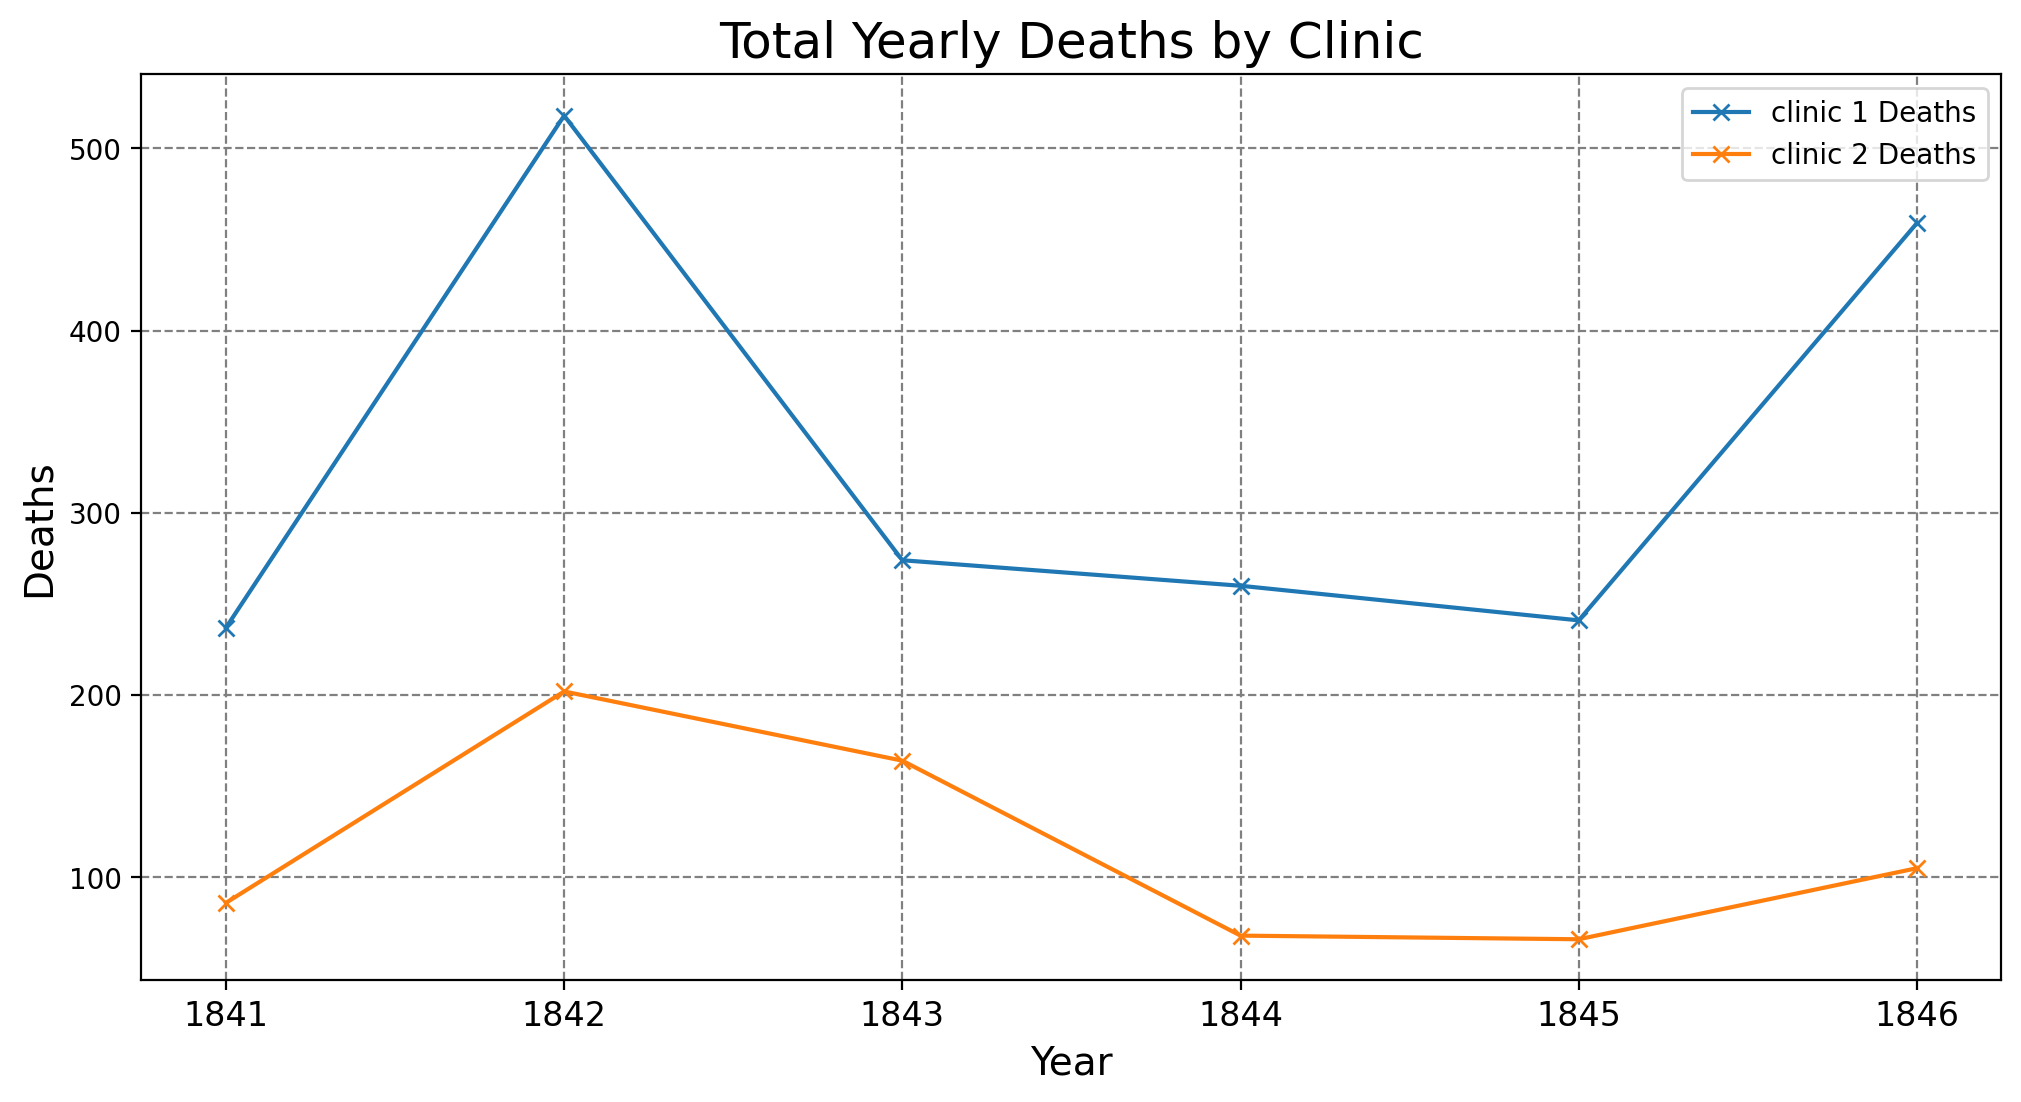

In [15]:
# 병동 별 산모 사망수 그래프 
plt.figure(figsize=(12, 6), dpi=200)
plt.title('Total Yearly Deaths by Clinic', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.xticks(df_year['year'].unique(), fontsize=12)

# Clinic 1과 Clinic 2에 대한 선 그래프
for clinic in df_year['clinic'].unique():
    plt.plot(df_year[df_year['clinic'] == clinic]['year'], df_year[df_year['clinic'] == clinic]['deaths'], label=f'{clinic} Deaths', marker='x')

plt.legend()
plt.grid(color='gray', linestyle='dashed')
plt.show()

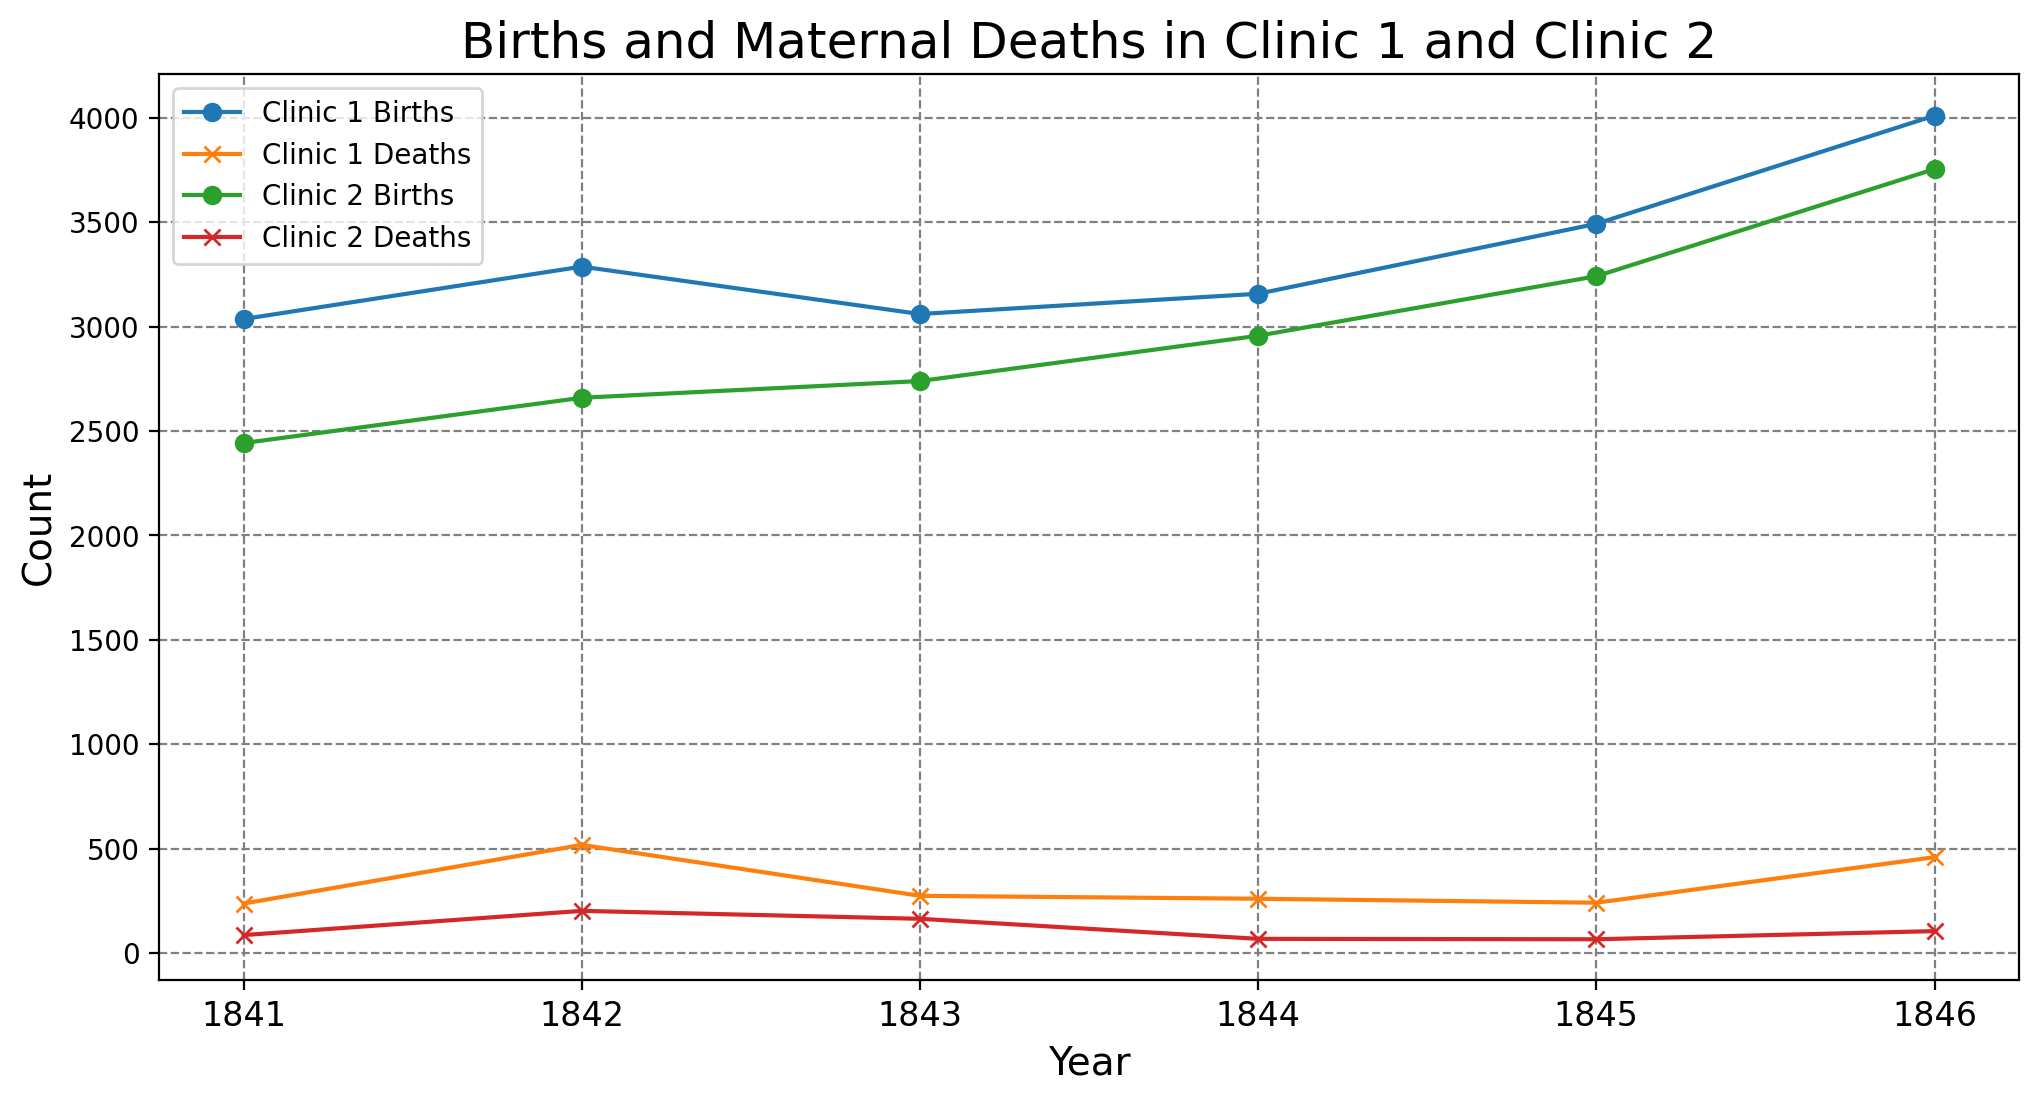

In [16]:
#  최종 선 그래프 그리기
plt.figure(figsize=(12, 6), dpi=200)
plt.title('Births and Maternal Deaths in Clinic 1 and Clinic 2', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(df_year['year'].unique(), fontsize=12)

# Clinic 1 출산과 산모 사망
plt.plot(df_year[df_year['clinic'] == 'clinic 1']['year'], df_year[df_year['clinic'] == 'clinic 1']['births'], label='Clinic 1 Births', marker='o')
plt.plot(df_year[df_year['clinic'] == 'clinic 1']['year'], df_year[df_year['clinic'] == 'clinic 1']['deaths'], label='Clinic 1 Deaths', marker='x')

# Clinic 2 출산과 산모 사망
plt.plot(df_year[df_year['clinic'] == 'clinic 2']['year'], df_year[df_year['clinic'] == 'clinic 2']['births'], label='Clinic 2 Births', marker='o')
plt.plot(df_year[df_year['clinic'] == 'clinic 2']['year'], df_year[df_year['clinic'] == 'clinic 2']['deaths'], label='Clinic 2 Deaths', marker='x')

plt.legend()
plt.grid(color='gray', linestyle='dashed')
plt.show()

- 해가 지날수록 병원에서 출산 여성이 많아졌었다. 남자 의사와 의대생들이 일하는 1병동은 그래서 더 바빴을 수도 있고 아니면 단순히 큰 병동이라 2병동보다 출산이 많을 수도 있다.
- 1병동에서 출산이 더 많아졌을 뿐만 아니라 산모의 사망수도 많다는 것을 알 수 있다. 

#### 2-2. 각 병동의 사망률 계산

In [17]:
# 사망률 계산 후 pct_deaths 컬럼에 저장 - (사망자 수 / 출산 산모 수 ) * 100
df_year['pct_deaths'] = (df_year['deaths'] / df_year['births']) * 100
df_year

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406


In [18]:
# 1병동과 2병동 평균 산모 사망률 계산 (출산 총횟수당 산모 사망횟수) - (병동 사망자 수 총합 / 병동 출산 산모 수) * 100
df_year_group = df_year.groupby('clinic').sum()
(df_year_group['deaths'] / df_year_group['births']) * 100

clinic
clinic 1    9.924159
clinic 2    3.883986
dtype: float64

In [19]:
# 또다른 방법 

# 1병동 평균 사망률 
clinic_1 = df_year[df_year.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

# 2 병동 평균 사망률 
clinic_2 = df_year[df_year.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 1 is 9.92%.
Average death rate in clinic 2 is 3.88%.


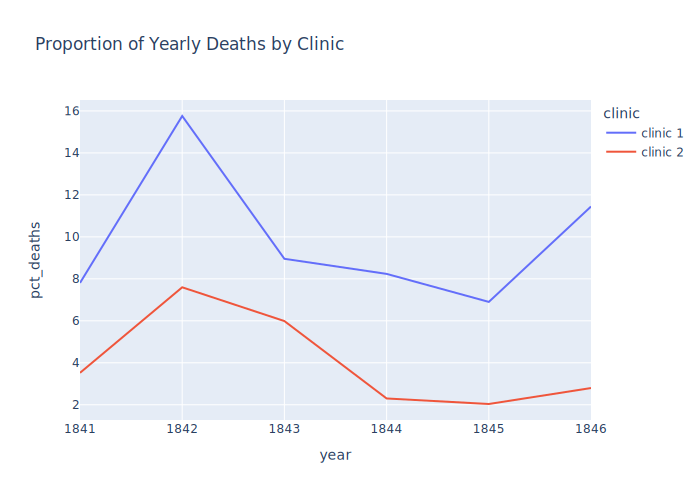

In [20]:
# 병동 별 산모 사망수 그래프 
line = px.line(df_year, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show(renderer='svg')

- 각 병동당 평균 사망률을 구해보았는데 1병동이 9.92%, 2병동이 3.88%으로 결과가 나왔다. 
- 그리고 각 병동당 기간에 따라 산모 사망률을 그래프로 나타내보았는데, 역시 1병동의 사망이 많았다, 특히 1842년의 경우 1병동에서 약 16%의 산모가, 2병동에서는 7.6%의 산모가 사망한 것으로 나왔다. 
- 이렇게 2병동은 1병동보다 사망률이 계속 낮았다. 왜 이러는 것일까?

- 처음에 젬멜와이스는 출산시 산모의 출산 자세가 문제가 있다고 생각했다. 왜냐하면 1병동에서는 산모가 등을 대고 누운 자세로 출산을 2병동에서는 옆으로 누워서 출산을 시켰기 때문이다. 이를 바탕으로 1병동에서도 2병동처럼 동일하게 옆으로 누워 출산을 하게 되었다. 하지만 사망률 감소에는 아무런 도움이 되지 않았다. 
- 다음으로 젬멜와이스는 병동에서 누군가 죽을 때마다 신부가 종을 울리며 1병동에 있는 산모들의 침대 옆으로 지나간다는 사실을 알았다. 어쩌면 신부와 종소리가 산모들에게 영향을 주어 죽음에 이르게 한다는 생각을 해서, 젬멜와이스는 신부가 경로를 바꾸고 종을 울리지 못하도록 했다. 하지만 역시 효과는 없었다. 
- 이후 젬멜와이스는 이 문제를 해결하지 못한 상실감에 베네치아로 휴가를 다녀오게 된다. 휴가를 마치고 복귀했을 때, 병리학자인 동료 하나가 병에 앓다 사망했다는 소식을 듣게된다. 동료는 산욕열로 죽은 여성을 부검하면서 손가락을 찔렸고, 그 후 병을 앓고 고통속에서 결국 목숨을 잃었다고 전해들었다.
- 이 현상을 보고 젬멜와이스는 병리학자의 증상을 살펴보다가 병리학자가 자신이 부검하던 여성과 같은 원인으로 죽었다는 사실을 깨닫게 된다. 산모가 아니더라도, 누구나 산욕열로 아플 수 있다라는 생각을 하게 된 것이다.
- 젬멜와이스를 "어쩌면 의사와 의대생들이 부검도중 시체를 해부하다가 손이닿은 시체의 작은 한 부분에 입자(세균)가 있었을 수 있고, 의사가 1병동에서 아기 분만을 도울 때 이 입자(세균)가 산모의 몸 속으로 침투해 산모가 병에 걸려 죽었을 것이다." 라는 새로운 이론으로 이끌 수 있는 계기가 되었다.

### 3. 손 씻기의 효과 
- 1847년 6월, 젬말와이스는 의료진 모두에게 손과 의료 도구를 씻게했다. 단순히 물과 비누로만 씻는 것이 아니라 염소 용액을 사용하게 했다(당시에는 그도 몰랐지만, 염소는 놀라운 살균제이다). 젬멜와이스가 염소를 선택한 이유는 부검 후 의사의 손에서 나는 냄새를 없애기 위해서였다. 당시에는 박테리아나 세균, 바이러스에 대해 아는 사람이 없었으니, 냄새로 판단한 것으로 파악된다.

#### 3-1.  출산당 산모 사망률 구하기

In [21]:
# 사망률 계산 후 새로운 컬럼에 저장
df_monthly['pct_deaths'] = df_monthly['deaths'] / df_monthly['births']
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [22]:
# 손을 씻으라고 주문하기 전 데이터 추출 
before_washing = df_monthly[df_monthly['date'] < '1847-06-01']
before_washing.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [23]:
# 손을 씻으라고 주문하기 후 데이터 추출 
after_washing = df_monthly[df_monthly['date'] >= '1847-06-01']
after_washing.head()

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568


In [24]:
# 손씻기 전과 손씻기 후 사망률 평균 비교 
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100

print(f'Average death rate before 1847.06 was {bw_rate:.4}%')
print(f'Average death rate after 1847.06 was {aw_rate:.4}%')

Average death rate before 1847.06 was 10.53%
Average death rate after 1847.06 was 2.153%


#### 3-2 사망률의 연속 평균 계산

In [25]:
# 연속하는 6개월 동안의 평균 사망률을 계싼하기 위해 롤링 윈도우 계산 사용
roll_df = before_washing.set_index('date')    # 날짜열 인덱스로 설정
roll_df = roll_df.rolling(window=6).mean()    # 롤링 윈도우를 사용하여 평균 계산

# 결과 확인
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.500000,29.000000,0.111277
1847-02-01,290.500000,23.500000,0.084390
1847-03-01,296.166667,18.833333,0.066415


#### 3-3. 라인 차트의 세부 항목 강조하기

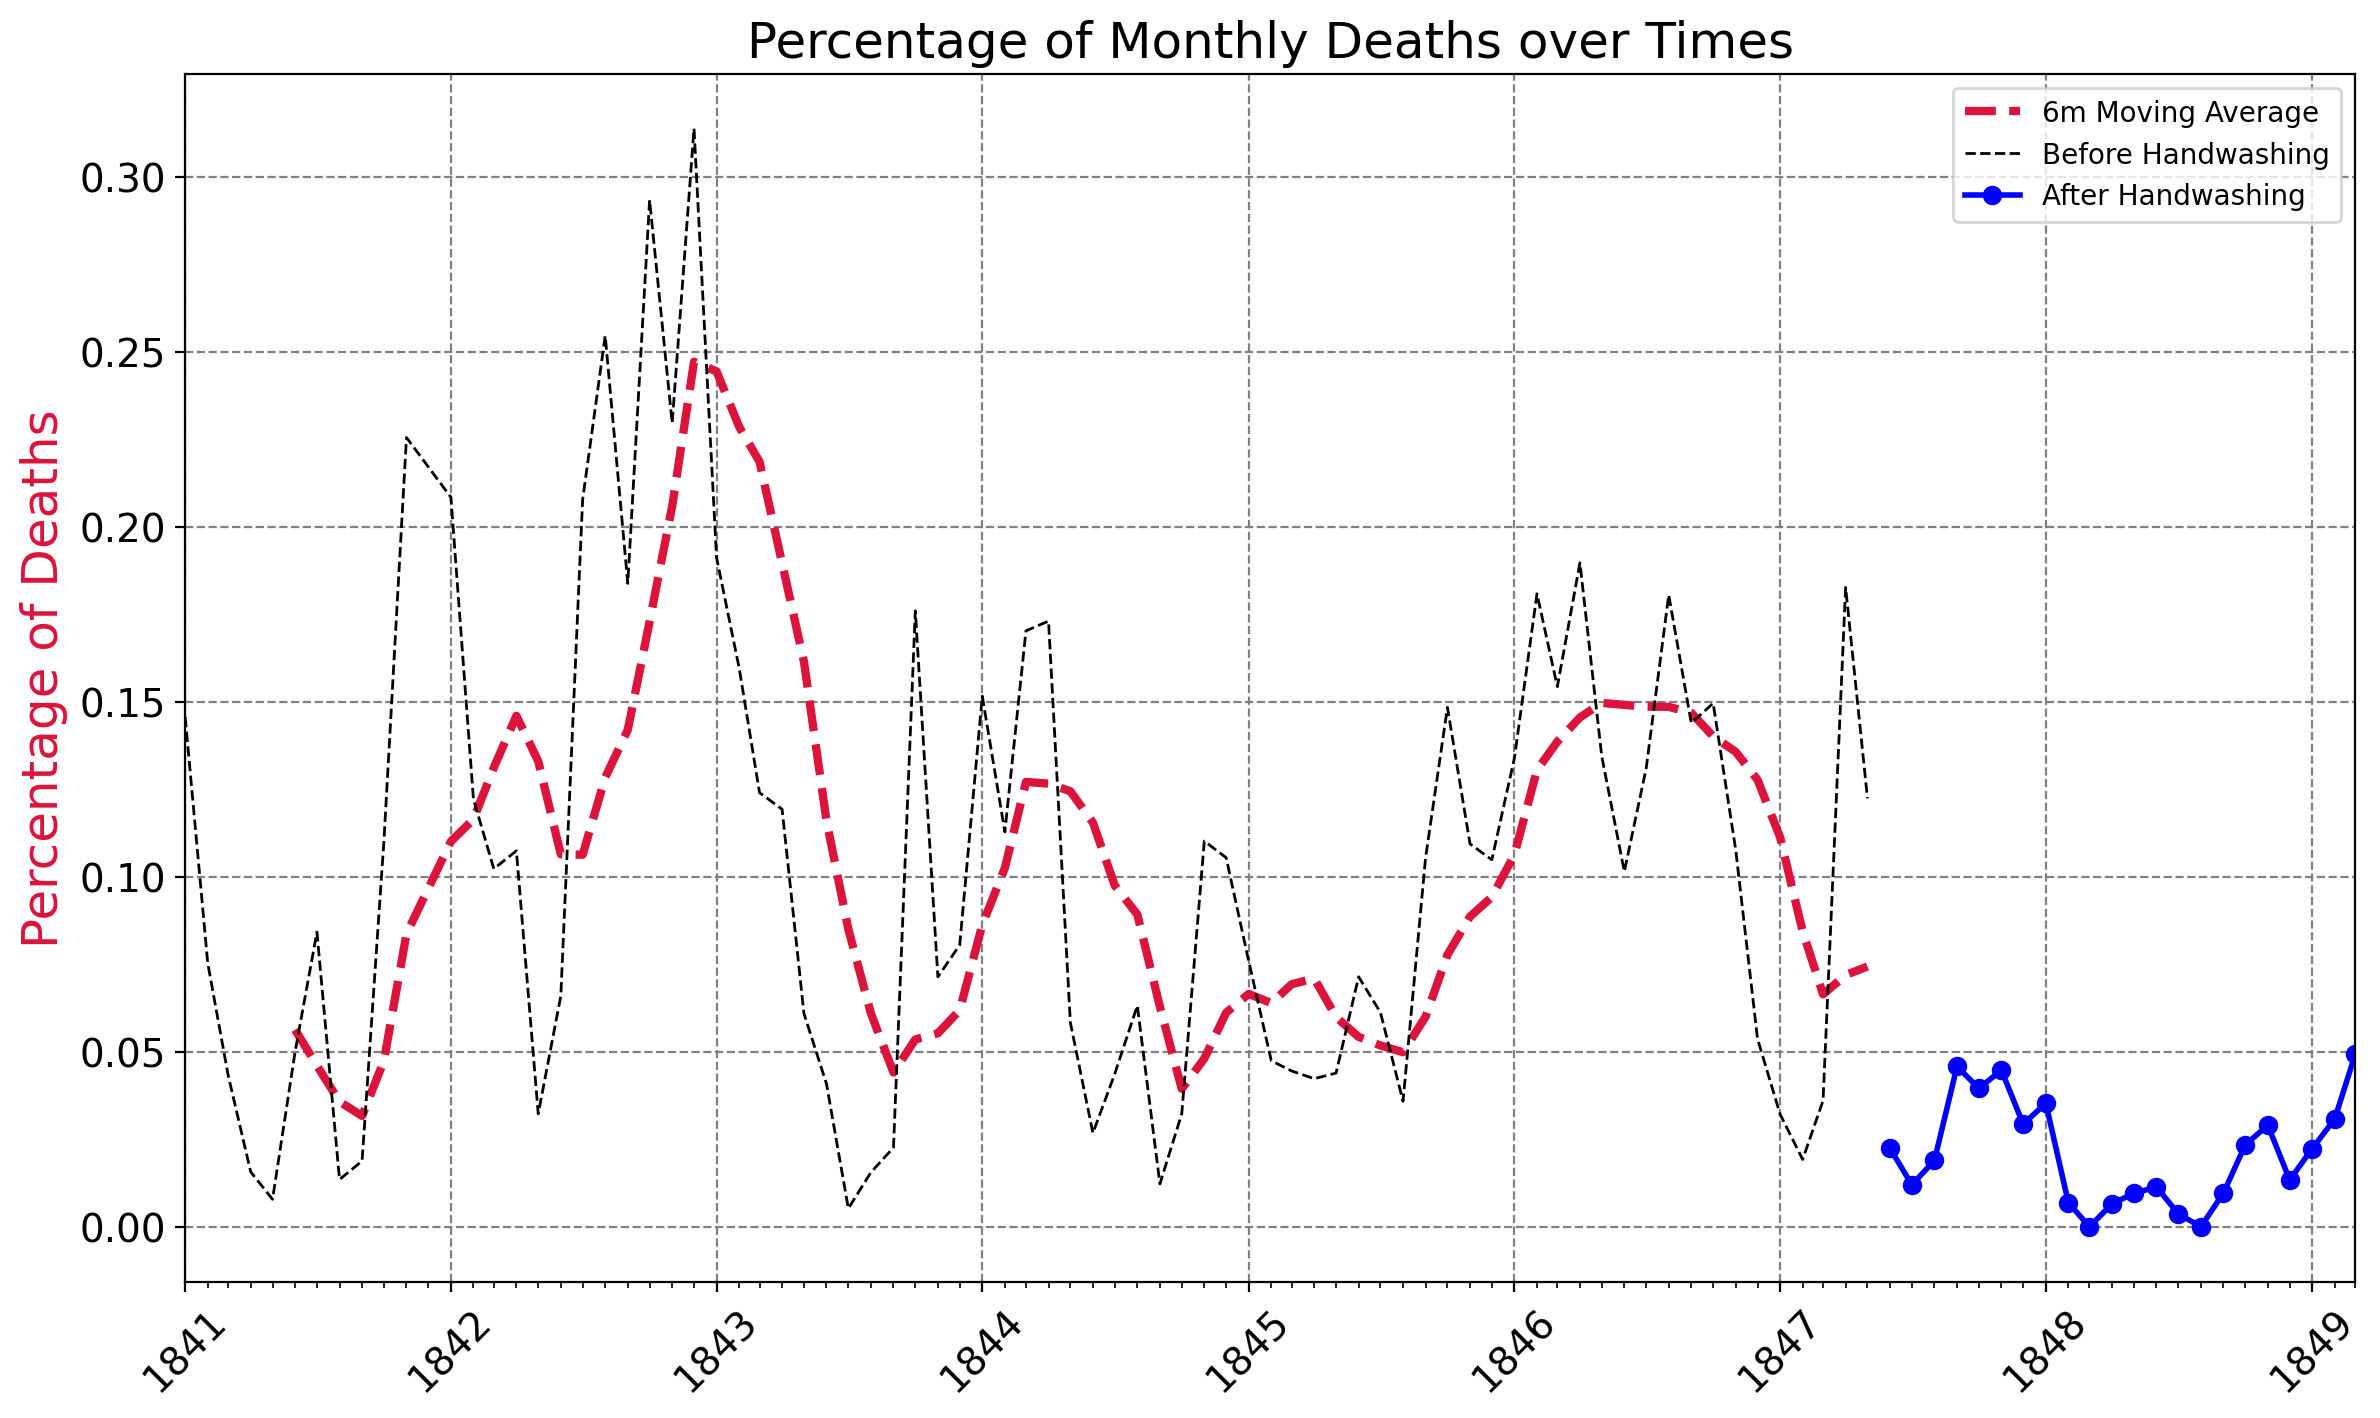

In [26]:
# 데이터 시각화 - 추가 및 수정
plt.figure(figsize=(14,8), dpi=200)                                  # 사이즈와 인치당 도트수 설정
plt.title('Percentage of Monthly Deaths over Times', fontsize=18)    # 타이틀 설정
plt.yticks(fontsize=14)                                              # y축 레이블 크기 설정  
plt.xticks(fontsize=14, rotation=45)                                 # x축 레이블 크기 설정 및 각도 설정 

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)     # y축 레이블 설정

ax = plt.gca()                                                      # 현재 축 얻고  

ax.xaxis.set_major_locator(years)                                   # 년도 적용 
ax.xaxis.set_major_formatter(years_fmt)                             # 년도 지정된 데이터포메터 적용
ax.xaxis.set_minor_locator(months)                                  # 월 적용
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])         # x축 범위 설정

plt.grid(color='gray', linestyle='--')                               # 격자 설정 

# 차트 생성 및 스타일 추가 
ma_line = plt.plot(roll_df.index,                              # 기준 데이터 - x축 - 롤링 데이터 년도 
                   roll_df.pct_deaths,                         # 기준 데이터 - 왼쪽 y축 - 사망률 
                   color='crimson',                            # 선 색상 설정
                   linewidth=3,                                # 선 두께 설정
                   linestyle='--',                             # 선 스타일 설정
                   label='6m Moving Average')                  # 레이블 명 설정 
                   
bw_line = plt.plot(before_washing.date,                        # 기준 데이터 - x축 - 손 씻기 전 년도 
                   before_washing.pct_deaths,                  # 기준 데이터 - 오른쪽 y축 - 사망률
                   color='black',                              # 선 색상 설정
                   linewidth=1,                                # 선 두께 설정 
                   linestyle='--',                             # 선 스타일 설정
                   label = 'Before Handwashing')               # 레이블 명 설정
                   
aw_line = plt.plot(after_washing.date,                         # 기준 데이터 - x축 - 손 씻기 후 년도 
                   after_washing.pct_deaths,                   # 기준 데이터 - 오른쪽 y축 - 사망률
                   color='blue',                               # 선 색상 설정
                   linewidth=2,                                # 선 두께 설정 
                   linestyle='solid',                          # 선 스타일 설정
                   marker='o',                                 # 마크 설정
                   label = 'After Handwashing')                # 레이블 명 설정

# 범주 설정
plt.legend()
    
plt.show()

- 출산당 사망률을 계산해보니 손 씻기를 시작한 이후 10.53%에서 2.15%(약 8.23% 포인트 차이)까지 급격히 떨어졌다.

### 4. 분포를 시각화하고 통계적 유의성 검사하기 
- 1병동의 동료 의사들에게 손 씻기의 가치를 이해시킬 더욱 강력한 주장들이 있는데, 해당 주장들은 아래와 같다.
    - 첫 번째, 평균 월 사망률에 대한 통계 자료
    - 두 번째, 통계 자료에 첨부할 시각화 자료

#### 4-1. 평균 월 사망률에 대한 통계 자료 - 평균 월 사망률 차이 계산

In [33]:
# 손 씻기 전(1847년 6월 이전), 월 평균 사망률은?
avg_prob_before = before_washing['pct_deaths'].mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%')

Chance of death during childbirth before handwashing: 10.5%


In [34]:
# 손 씻기 후 (1847년 6월 이후), 월 평균 사망률은?
avg_prob_after = after_washing['pct_deaths'].mean() * 100
print(f'Chance of death during childbirth after handwashing: {avg_prob_after:.3}%')

Chance of death during childbirth after handwashing: 2.11%


In [38]:
# 사망률 계산

# 손 씻기 전과 후 차이 계산 
differences = avg_prob_before - avg_prob_after
print(f'This is a {differences:.2}% point differences!')

# 손 씻기 전과 후 사망률 배수 차이 계산
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

This is a 8.4% point differences!
This is a 5.0x improvement!


- 많은 통계 검증이 평균과 같이 분포의 특징을 비교하는 것에 의존한다. 손 씻기 전 평균 사망률이 10.5%이고 손 씻기가 의무화되자 평균 사망률이 2.11%가 된 것을 알 수 있다. 
- 이로써 알 수 있는 점은 손 씻기가 평균 사망률을 8.4%나 낮췄고, 약 5배의 사망률을 개선하는데 큰 영향을 끼쳤다. 

#### 4-2. 통계 자료에 첨부할 시각화 자료 1 - 손 씻기 전과 후 사망률 변화 추이를 위한 Boxplot

In [52]:
# 손 씻기 전 후 구분 
df_monthly['washing_hands'] = np.where(df_monthly.date < '1847-06-01', 'Before', 'After')
df_monthly

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.145669,Before
1,1841-02-01,239,18,0.075314,Before
2,1841-03-01,277,12,0.043321,Before
3,1841-04-01,255,4,0.015686,Before
4,1841-05-01,255,2,0.007843,Before
...,...,...,...,...,...
93,1848-11-01,310,9,0.029032,After
94,1848-12-01,373,5,0.013405,After
95,1849-01-01,403,9,0.022333,After
96,1849-02-01,389,12,0.030848,After


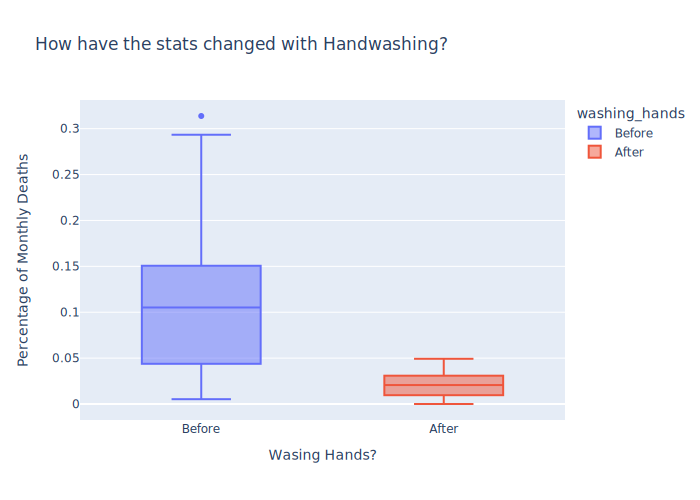

In [57]:
# box plot 그리기 
box = px.box(df_monthly,
             x = 'washing_hands',
             y = 'pct_deaths',
             color = 'washing_hands',
             title = 'How have the stats changed with Handwashing?')

box.update_layout(xaxis_title='Wasing Hands?',
                  yaxis_title='Percentage of Monthly Deaths')

box.show(renderer='svg')

- 위의 그래프에서는 1842년 말 사망 횟수의 급증을 확인할 수 있다. 30% 이상의 산모가 출산한 달에 병원에서 사망하였다. (Before 쪽 아웃라이어가 30% 이상으로 나타남) 
- 또한 우리는 Boxplot에서 평균 사망률이 어떻게 감소했는지 뿐만 아니라 전체 범위가 감소한 것도 확인할 수 있다. (최댓값과 제 3사분위수도 더 낮음)

#### 4-3. 통계 자료에 첨부할 시각화 자료 2 - 히스토그램으로 결과의 월 분포 시각화 

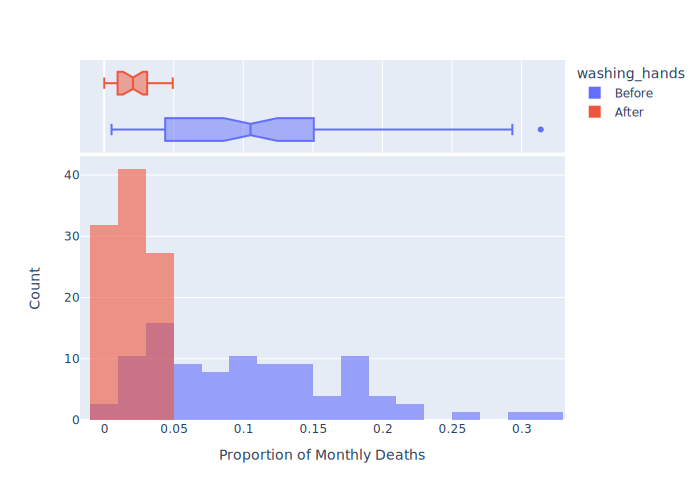

In [67]:
# 히스토그램 나타내기 
hist = px.histogram(df_monthly,              # 기준 데이터 
                    x='pct_deaths',          # x축 
                    color='washing_hands',   # 비교를 위해 색상 기준 데이터 설정 
                    nbins=30,                # x축을 나누는 bin의 개수 설정 - 영역을 몇 등분할지 설정
                    opacity=0.6,             # 투명도 설정
                    barmode='overlay',       # 막대 겹쳐서 사용하기 설정 
                    histnorm='percent',      # 정규화 타입 설정 - 퍼센트
                    marginal='box')          # 히스토그램 위에 나타낼 주변 분포 그래프 설정 - boxplot

hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count')

hist.show(renderer='svg')

- 데이터가 약 98개 정도밖에 없어서 히스토그램이 들쭉날쭉 보인다. 매끈한 정규 분포 그래프가 아니다. 하지만 분포가 어떻게 보여질지 커널 밀도 추정으로 추정할 수 있다.

#### 4-4. 통계 자료에 첨부할 시각화 자료 3 - 커널 밀도 추정으로 분포 시각화 수정

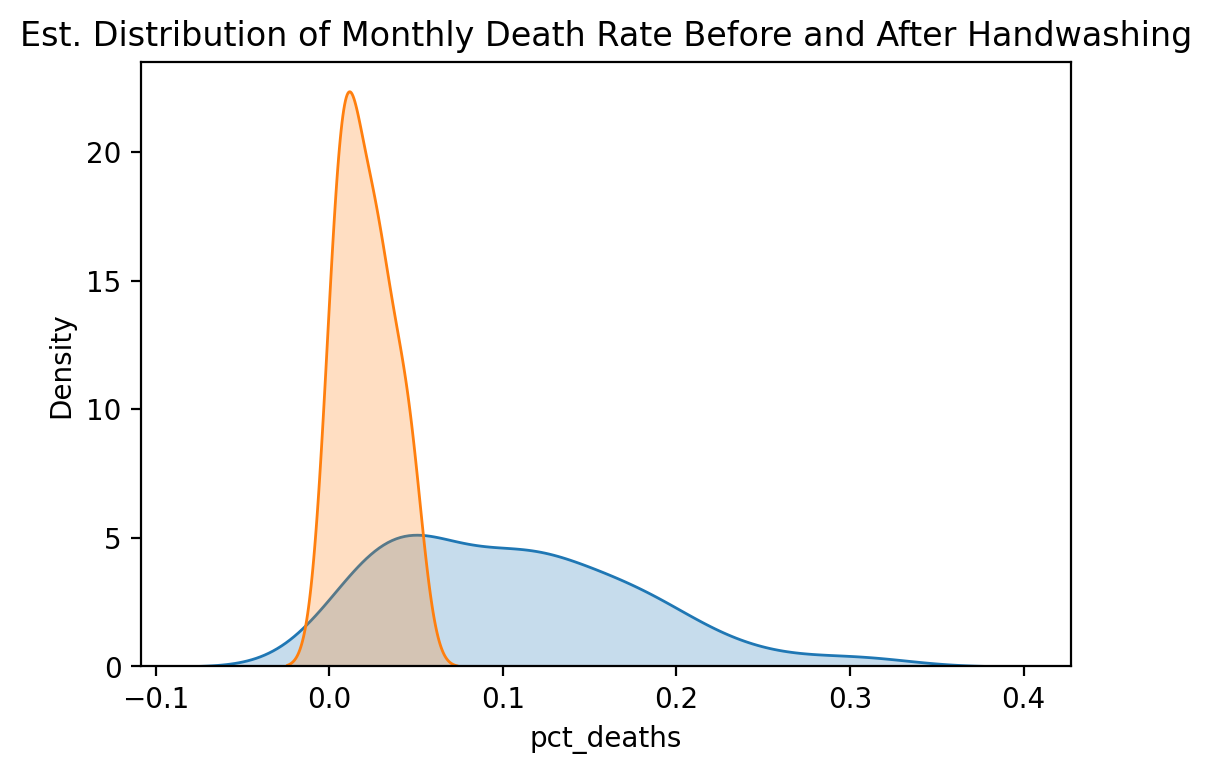

In [70]:
# 손 씻기 전과 후, 두 커널 밀도를 추정하기 위한 그래프
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)

plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

- 사망률의 추정 분포를 나타내는 두 정규 분포 그래프를 그리기 위해 위에 처럼 '.kdeplot()'을 두 번 호출 하였다. 
- 하지만 문제는 월 사망률의 왼쪽 꼬리에서 음수가 나온다라는 점이다. 

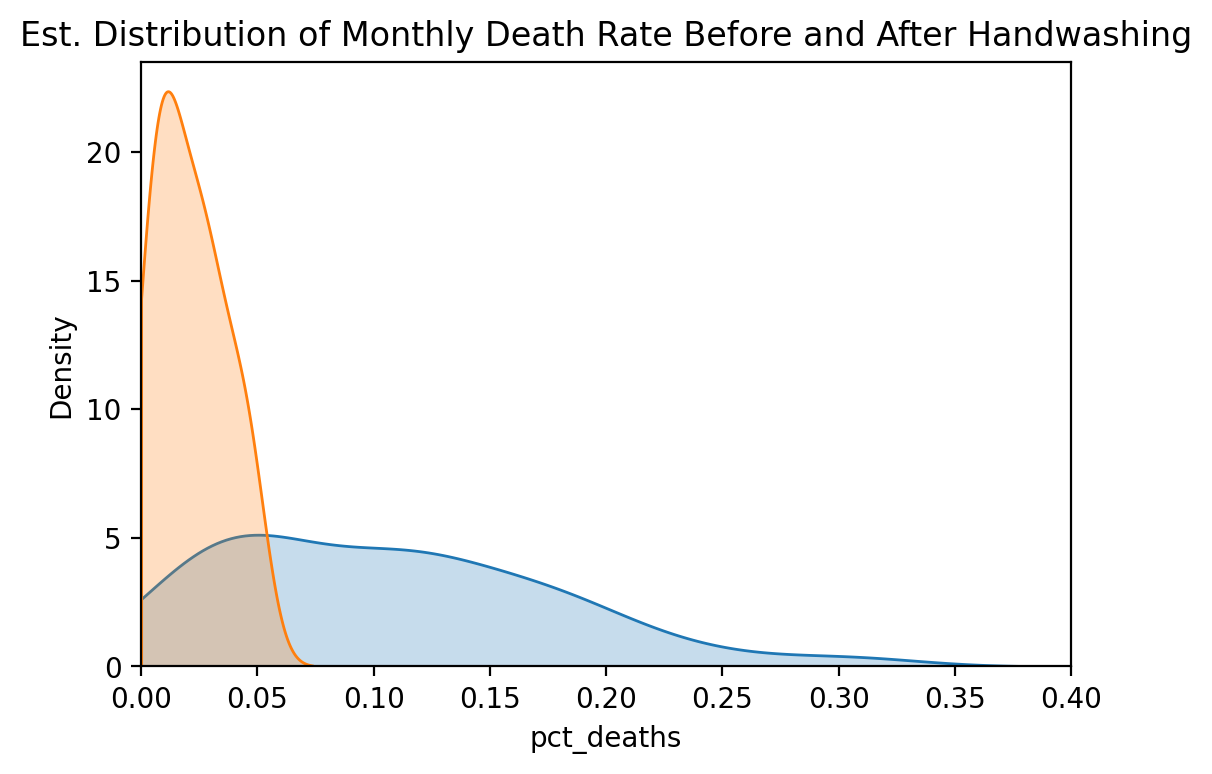

In [71]:
# 사맘률의 하한선을 0으로 설정하여 다시 그리기
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

- 이제 두 분포가 어떤 모양인지 알았으므로 통계 검증을 이용하여 손 씻기에 대한 주장을 더 강화할 수 있다.
- 분포가 순전히 우연에 의해 아주 다르게 나타났는지(즉, 더 낮은 사망률이 그저 우연인지), 아니면 평균 사망률 8.4%의 차이가 통계적으로 의미가 있는지 검증할 수 있다. 

#### 4-5. T-Test를 이용하여 통계적 유의성 찾기
- T-Test를 이용해 평균 차이가 통계적으로 의미가 있는지 또는 완전히 우연인지 밝힐수 있다.
- 만약 p-value가 1% 미만이라면 손 씻기가 평균 월 사망률 차이의 원인임을 99% 확신할 수 있다.  

In [74]:
# T-Test를 통한 통계 검증
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)

print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


- p-value를 계산하니 0.0000002985%로 1% 보다 훨씬 낮았다. 다시 말해 평균의 차이는 통계적으로 매우 의미가 있다고 말할 수 있다.

### 이번 Study에서 배운 내용 요약 
- 히스토그램을 이용해 분포를 시각화하는 방법
- 연속된 데이터가 길이가 다를 때도 서로의 맨 위에 히스토그램을 덧붙이는 방법
- 히스토그램을 매끈하게 하는 방법과 커널 밀도 추정(KDE)으로 분포를 시각화하는 방법
- 추정치에 경계를 설정해 KDE를 개선하는 방법
- Scipy를 이용하는 방법과 p-value로 통계적 유의성을 검증하는 방법
- 맷플롯립에서 시계열 차트의 다른 부분을 강조하는 방법
- 맷플롯립에서 범례를 추가하고 설정하는 방법
- 조건에 따라 요소를 처리하기 위해 NumPy의 .where() 함수를 사용하기

### 여담 - 젬멜와이스 의사의 비극적 이야기 
- 이제 해당 이야기의 결말을 말할 차례다. 젬멜와이스의 이론, 즉, 산욕열이 부검실 시체에서 나온 어떤 ‘물질’(우리가 오늘날 박테리아로 알고 있는 것) 때문이라는 이론을 발표했고, 그것을 뒷받침하는 놀라운 증거가 있음에도 불구하고 당시 의료계에서 받아들여지지 않았다. 왜 일까? 
- 그 이유 중 하나는 젬멜와이스가 그렇게 기지 있는 사람은 아니었기 때문이다. 그는 의사들이 산욕열을 산모들에게 ‘옮기고’ 있는 것처럼(사실이긴 했습니다) 말하고 다녔다. 이것은 동료 의사들이 듣고 싶어 하는 말은 아니였을 것이다. 
- 게다가 그는 데이터를 발표할 때, 어떠한 시각화도 나타내지 않고, 그저 긴 표의 형태로만 발표했는데, 아래의 긴 표는 실제로 무슨일이 일어났는지 알기 어렵게했다. 또한 당시 당시 통계 자료와 통계적 주장은 의학계에서 일반적이지 않았다.

<img src="assets/static_by_jem.png">

- 결국 젬멜와이스가 주장한 강력하고 영향력이 있는 이론들은 받아들여지질 않았다. 그 후 젬멜와이스는 비엔나 병원에서 해고되었고 의사들은 염소로 손 씻기를 그만두게 되었다. 
- 젬멜와이스는 나이가 들수록 더 화가 많아졌고 나중엔 정말 ‘이상해졌다.’ 큰 좌절감 때문이었을 수도 있고 어쩌면 알츠하이머나 매독 같은 또 다른 병의 결과였을지도 모른다. 
- 안타깝게도 1965년 젬멜와이스는 47세의 나이에 정신병원에 입원하게 되고, 그 후 혈류 내 감염의 합병증인 패혈증으로 사망하게 된다. 아이러니한 점은 패혈증은 그가 열심히 죽어가는 산모들에게서 막으려고 했던 산욕열과 비슷한 질병이라는 사실이다.
- 젬멜와이스의 업적은 20년이 지나서야 비로소 루이스 파스퇴르의 세균설에 의해 인정받게 된다.